In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [73]:
V_o=np.array([4.06, 4.04, 4.00, 3.90, 3.86, 3.86, 3.86])
V_c=np.array([4.06, 3.88, 3.42, 1.20, 0.624, 0.133, 0.072])
shift = np.array([3.87, 17.5, 31.0, 72.5, 82.4, 86.0, 84.0])
freq=np.array([10, 50, 100, 500, 1000, 5000, 10000])
Vc_Vo = V_c / V_o


In [88]:
def fit_model(x, A, tau):
    denom = (1 + x ** 2 * tau ** 2) ** 0.5
    return A / denom

def shift_model(x, tau):
    return - tau * x


In [20]:
start_pars = [1, 0.01]

pars, cov = opt.curve_fit(fit_model, freq, Vc_Vo, p0=start_pars)

A, tau = pars
A_err, tau_err = np.sqrt(np.diag(cov))

y_pred = fit_model(np.logspace(0, 4), A, tau)


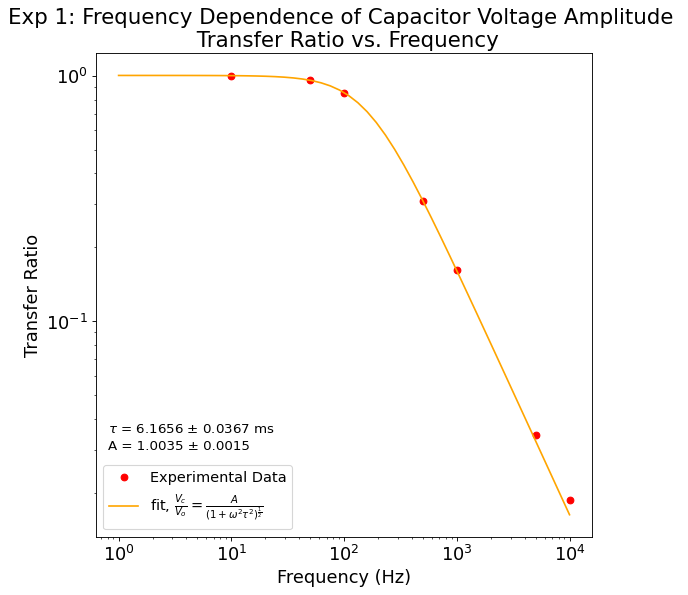

In [70]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.loglog(freq, Vc_Vo, 'ro', label='Experimental Data')
plt.plot(np.logspace(0, 4), y_pred, color='orange', label=r'fit, $\frac{V_c}{V_o}=\frac{A}{(1+\omega^2\tau^2)^\frac{1}{2}}$')

# Axes label and title
plt.title("Exp 1: Frequency Dependence of Capacitor Voltage Amplitude \n Transfer Ratio vs. Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transfer Ratio")
plt.legend(loc='lower left', prop={'size': 13})
plt.text(.8, .03, "A = %5.4f \u00b1 %5.4f" %(A, A_err), fontsize=12)
plt.text(.8, .035, r'$\tau$ '+"= 6.1656 \u00b1 0.0367 ms", fontsize=12)
plt.show()


In [89]:
pars, cov = opt.curve_fit(shift_model, freq, shift)

tau = pars
tau_err = np.sqrt(np.diag(cov))

y_pred = shift_model(np.logspace(0, 4), tau)


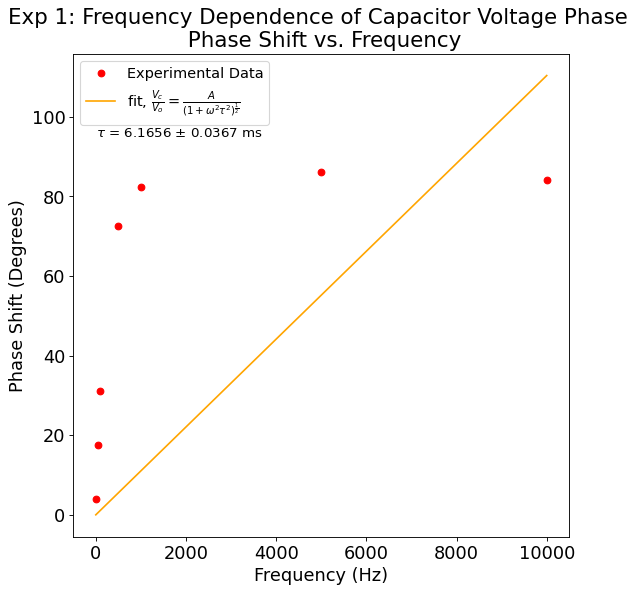

In [91]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.plot(freq, shift, 'ro', label='Experimental Data')
plt.plot(np.logspace(0, 4), y_pred, color='orange', label=r'fit, $\frac{V_c}{V_o}=\frac{A}{(1+\omega^2\tau^2)^\frac{1}{2}}$')

# Axes label and title
plt.title("Exp 1: Frequency Dependence of Capacitor Voltage Phase \n Phase Shift vs. Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Shift (Degrees)")
plt.legend(loc='upper left', prop={'size': 13})
plt.text(.8, 95, r'$\tau$ '+"= 6.1656 \u00b1 0.0367 ms", fontsize=12)
plt.show()



In [87]:
tau

array([0.0110299])